In [1]:
# LLEGENDA DE LES COLUMNES DEL DATASET
# ==============================================================================
# (0) descripcio;(1) descripcio2;(2) any;(3) provincia;(4) kms;(5) matriculacio;(6) garantia;(7) color;(8) ambiental;
# (9) preu;(10) preu-nou;(11) llarg;(12) ample;(13) alt;(14) batalla;(15) maleter;(16) peso-max;(17) carroceria;(18) portes;
# (19) places;(20) combustible;(21) cilindrada;(22) cilindres;(23) sobrealimentacio;(24) traccio;(25) transmisio;(26) marxes;
# (27) potencia-kw;(28) potencia-cv;(29) par;(30) velocitat-max;(31) acceleracio;(32) consum-urba;(33) consum-carretera;
# (34) consum-mitja;(35) co2;(36) diposit;(37) tipus-venedor;(38) data-publicacio

In [ ]:
# Importem llibreries bàsiques
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [2]:
# Funcions per convertir valors en format string a formats int64 i float64
# ==============================================================================
def extract_int(string):
    
    try:
        
        n_string = re.sub("[^0-9]+","",string)

        if n_string:

            return np.int64(n_string)

        return 0
    
    except TypeError:
        
        return np.nan

def extract_float(string):
    
    try:
    
        n_string = re.sub("[^0-9,.]+","",string).replace(",",".")

        if n_string:

            return np.float64(n_string)

        return 0

    except TypeError:
        
        return np.nan

def missing_cat(model,col):
   
    try:
       
        return freq_vals_cat.loc[model,col]
   
    except:
       
        return df[col].value_counts().index[0]


In [3]:
# Conversió columnes a datatype int64 i float64
# ==============================================================================# ==============================================================================
df = pd.read_csv("audi.csv", sep = ";",header=None)
df.iloc[:,4] = df.iloc[:,4].apply(lambda x: int(re.sub("[^0-9]+","",x))) #km
df.iloc[:,5] = pd.to_datetime(df.iloc[:,5]) #date
df.iloc[:,6] = df.iloc[:,6].apply(extract_int) #mesos
df.iloc[:,9] = df.iloc[:,9].apply(extract_int)
df.iloc[:,10] = df.iloc[:,10].apply(extract_int)
df.iloc[:,11] = df.iloc[:,11].apply(extract_int)
df.iloc[:,12] = df.iloc[:,12].apply(extract_int)
df.iloc[:,13] = df.iloc[:,13].apply(extract_int)
df.iloc[:,28] = df.iloc[:,28].apply(extract_int)
df.iloc[:,30] = df.iloc[:,30].apply(extract_int)
df.iloc[:,31] = df.iloc[:,31].apply(extract_float)
df.iloc[:,32] = df.iloc[:,32].apply(extract_float)
df.iloc[:,33] = df.iloc[:,33].apply(extract_float)
df.iloc[:,34] = df.iloc[:,34].apply(extract_float)
df.iloc[:,35] = df.iloc[:,35].apply(extract_int)
df.iloc[:,36] = df.iloc[:,36].apply(extract_int)
df.iloc[:,38] = pd.to_datetime(df.iloc[:,38],format='%d/%m/%Y')

# Comprovem datatype columnes
# ==============================================================================
df.dtypes

0           category
1             object
2              int64
3           category
4              int64
5     datetime64[ns]
6              int64
7           category
8           category
9              int64
10           float64
11           float64
12           float64
13           float64
14           float64
15            object
16           float64
17          category
18           float64
19           float64
20          category
21           float64
22          category
23          category
24          category
25          category
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37          category
38    datetime64[ns]
dtype: object

In [4]:
# Revisem valors dels camps model i versió
# ==============================================================================
cat_cols = [0,8,15,17,20,22,23,24,25]
cont_cols = [0, 2,  4,  6,  9, 10, 11, 12, 13, 14, 16, 18, 19, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
mean_vals_cont = df.iloc[:,cont_cols].dropna().groupby(0).agg("mean")
freq_vals_cat = df.iloc[:,cat_cols].dropna().groupby(0).agg(lambda x:x.value_counts().index[0])

In [5]:
# Revisem valors categories
# ==============================================================================
nan_env = df[df.iloc[:,8].isna()].index
cat_models = set(freq_vals_cat.index)
df.loc[nan_env][8] = df.loc[nan_env][[0,8]].apply(lambda x: freq_vals_cat.loc[x[0],8] if x[0] in cat_models else np.NaN, axis = 1)
nan_cat = df[df.iloc[:,15].isna()].iloc[:,8].index
df.loc[nan_cat,[15,17,20,22,23,24,25]] = df.loc[nan_cat][[0,15,17,20,22,23,24,25]].apply(lambda x: freq_vals_cat.loc[x[0],[15,17,20,22,23,24,25]] if x[0] in cat_models else np.NaN, axis = 1)# ==============================================================================

In [6]:
# Eliminem valors que contenen NaN segons columna 10
# ==============================================================================
nan_cont = df[df.iloc[:,10].isna()].index
cont_models = set(mean_vals_cont.index)
df.loc[nan_cont,[10, 11, 12, 13, 14, 16, 18, 19, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]] = df.loc[nan_cont][[0, 10, 11, 12, 13, 14, 16, 18, 19, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]].apply(lambda x: mean_vals_cont.loc[x[0],[10, 11, 12, 13, 14, 16, 18, 19, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]] if x[0] in cont_models else np.NaN, axis = 1)

In [7]:
# Corregim valors en variable 23
# ==============================================================================
df[[0,23]] = df[[0,23]].apply(lambda x: x if x[23] != "no link (0012)" else missing_cat(x[0],23), axis = 1)

In [8]:
# Corregim valors en variable 8
# ==============================================================================
df[[0,8]] = df[[0,8]].apply(lambda x: x if x[8] not in ["Carrocería","Carrocería:"] else missing_cat(x[0],8), axis = 1)

In [9]:
# Eliminem files amb NaN segons columnes 2, 4, 9, 27 i 31
# ==============================================================================
df = df.dropna(subset=[2, 4, 9, 27, 31])

In [49]:
# Categòriques
# ==============================================================================
df[[0, 3, 7, 8, 17, 20, 22, 23, 24, 25, 37]] = df[[0, 3, 7, 8, 17, 20, 22, 23, 24, 25, 37]].astype('category')

In [10]:
# Mostrem primer registre
# ==============================================================================
df.iloc[1,:]

0                         AUDI Q5
1           2.0TDI Advanced 110kW
2                            2018
3                       Castellón
4                           67000
5             2018-01-01 00:00:00
6                              24
7                          Blanco
8                               C
9                           33400
10                          43953
11                           4663
12                           1893
13                           1659
14                          2.819
15                      550/1.550
16                           2.32
17                   Todo Terreno
18                              5
19                              5
20                         Diesel
21                          1.968
22                              4
23    Turbo de geometría variable
24             Tracción delantera
25                         Manual
26                              6
27                            110
28                            NaN
29            

In [11]:
# Carreguem llibreries de gràfics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Carreguem llibreries per preprocessat i model
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [12]:
# Configuració matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuració warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

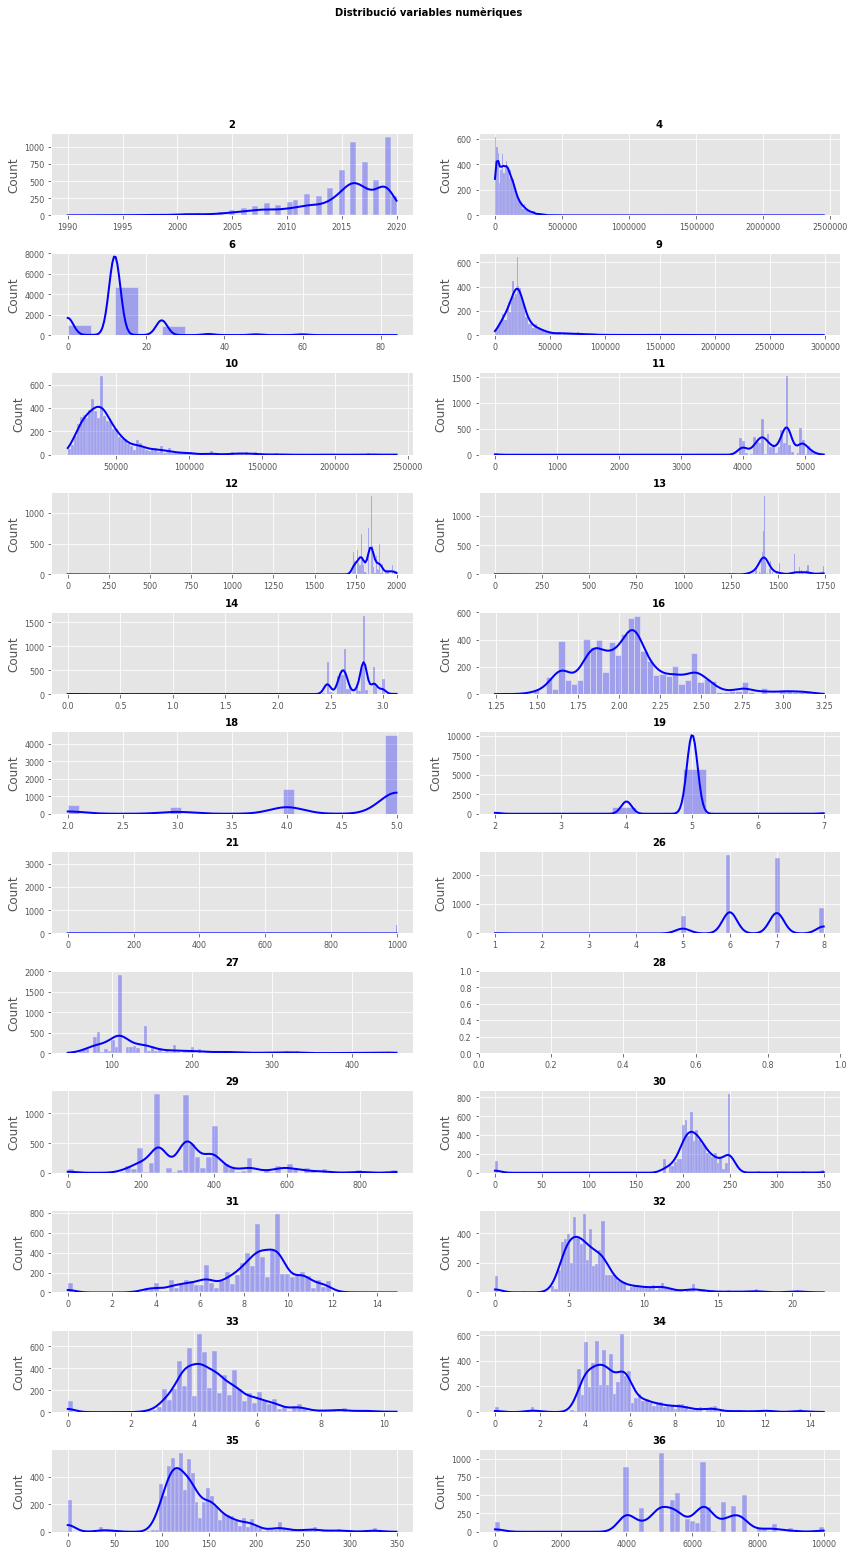

In [13]:
# Gràfica de distribució variables numèriques
# ==============================================================================
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(12, 22))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = 'blue',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució variables numèriques', fontsize = 10, fontweight = "bold");
# fig.savefig('var_num')

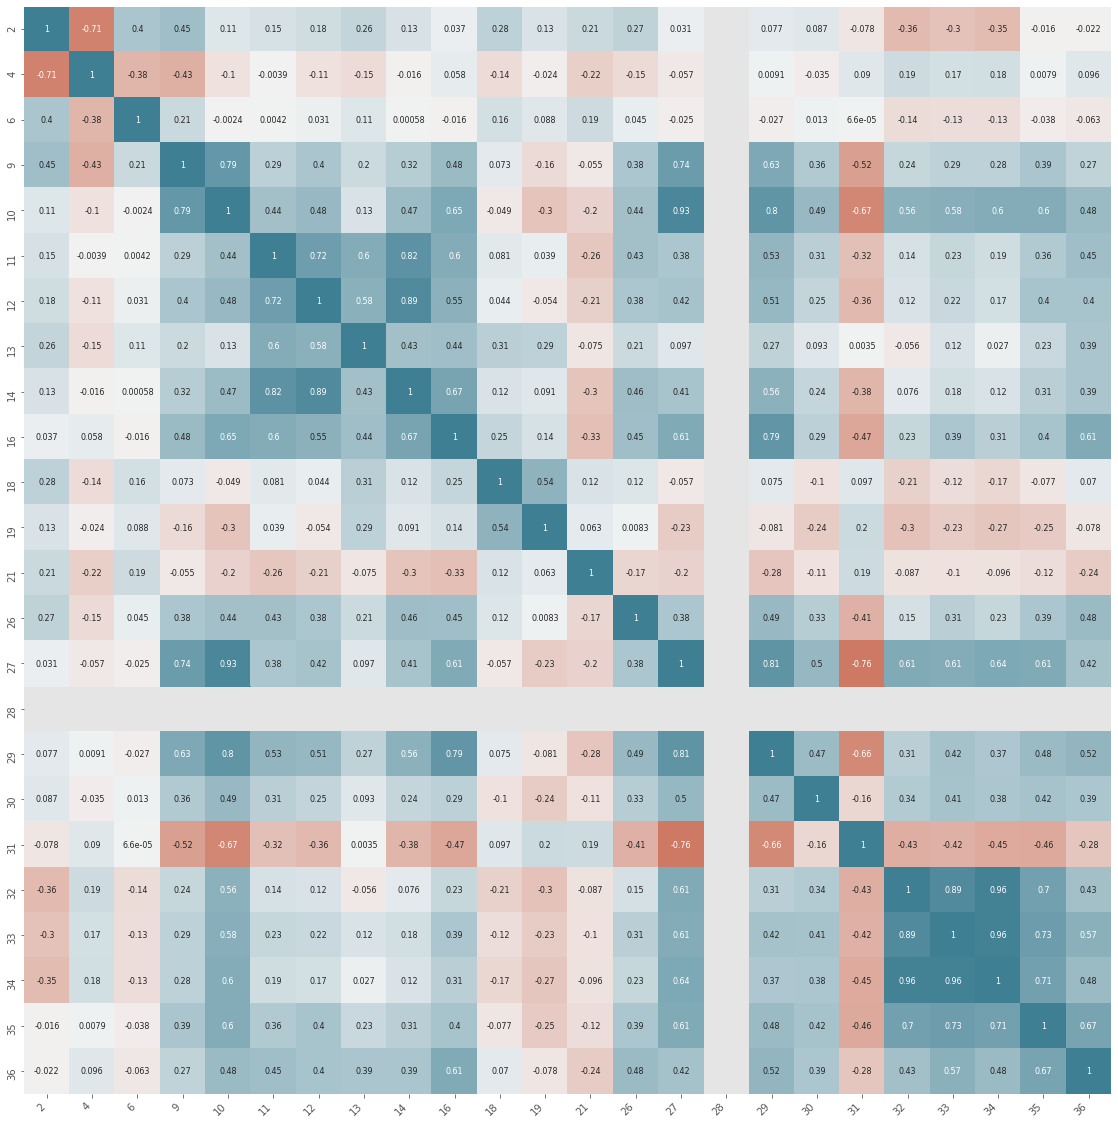

In [14]:
# Heatmap matriu de correlacions
# ==============================================================================
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
# fig.savefig('heatmap')

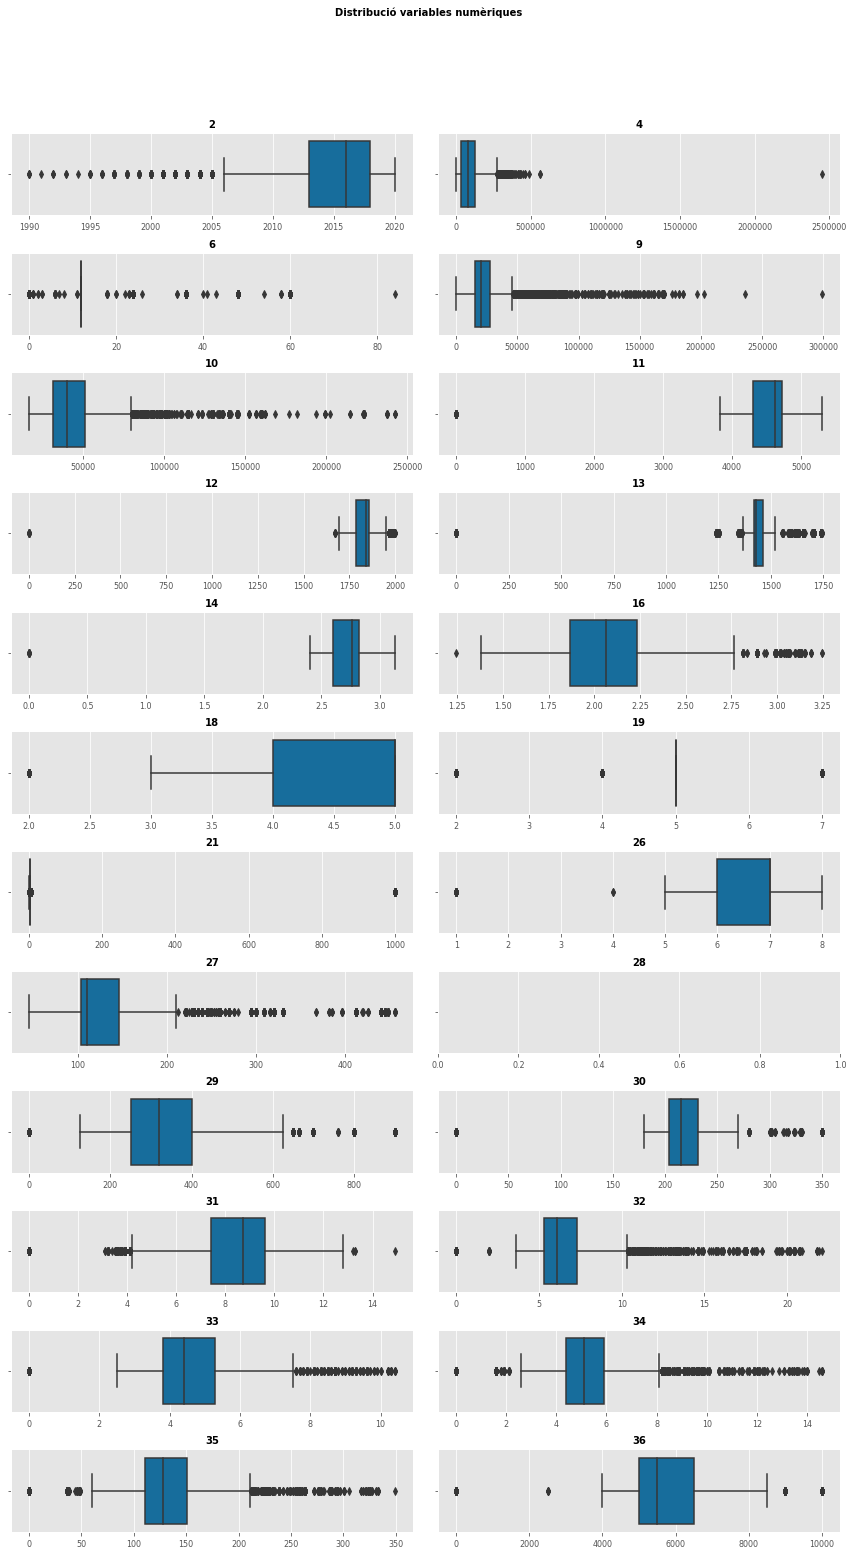

In [15]:
# Gràfica de distribució variables numèriques
# ==============================================================================
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(12, 22))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = df,
        x       = colum,
        palette="colorblind",
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució variables numèriques', fontsize = 10, fontweight = "bold");
# fig.savefig('var_boxplot')

In [50]:
# Eliminem NaN de les variables categòriques
# ==============================================================================
df2 = df.dropna(subset=[0, 3, 7, 8, 17, 20, 22, 23, 24, 25, 37])

In [51]:
# Simplifiquem els colors per rebaixar el nombre de categories
# ==============================================================================
df2[7] = df2[7].apply(lambda s: s.split(' ')[0].capitalize())
df2[7] = df2[7].astype('category')
df2[7].value_counts()

Negro                            1661
Gris                             1554
Blanco                           1423
Azul                              776
Rojo                              467
Plata                             141
-                                 102
Marrón                             71
Verde                              61
Beige                              36
Naranja                            29
Amarillo                           17
Daytona                            17
Marron                             12
Granate                            12
Gris-negro                          9
Glaciar                             8
Mythosschwarz                       8
Oro                                 8
Antracita                           7
Mitos                               6
Plateado                            6
Oscuro                              5
Plomo                               5
Florete                             5
Nardo                               5
Ibis        

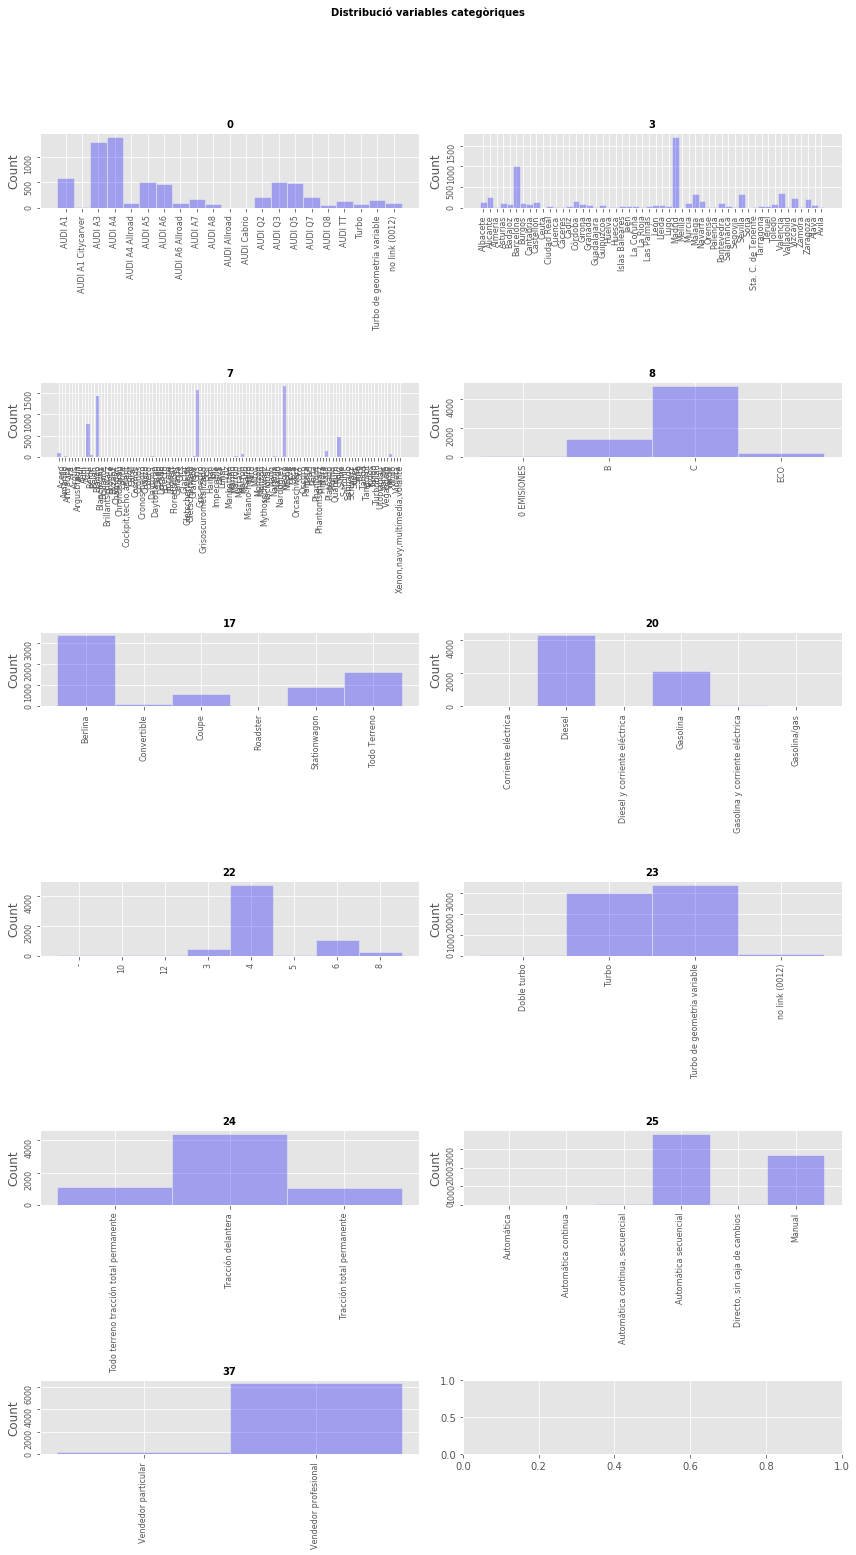

In [53]:
# Gràfica de distribució variables categòriques
# ==============================================================================
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 22))
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['category']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = colum,
        stat    = "count",
        kde     = False,
        color   = 'blue',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8, rotation=90)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució variables categòriques', fontsize = 10, fontweight = "bold");
# fig.savefig('var_categ')

In [54]:
# Divisió de dades en train i test
# ==============================================================================
X = df[[2, 4, 27, 31]]
y = df[9]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [55]:
# Creació del model utilitzant statmodels
# ==============================================================================
# Hem d'afegir una columna de 1s per obtenir el intercept del model
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3991.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:53:20   Log-Likelihood:                -57654.
No. Observations:                5404   AIC:                         1.153e+05
Df Residuals:                    5399   BIC:                         1.154e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.002e+06   8.82e+04    -34.023      0.0

In [56]:
# Diagnòstic residus
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

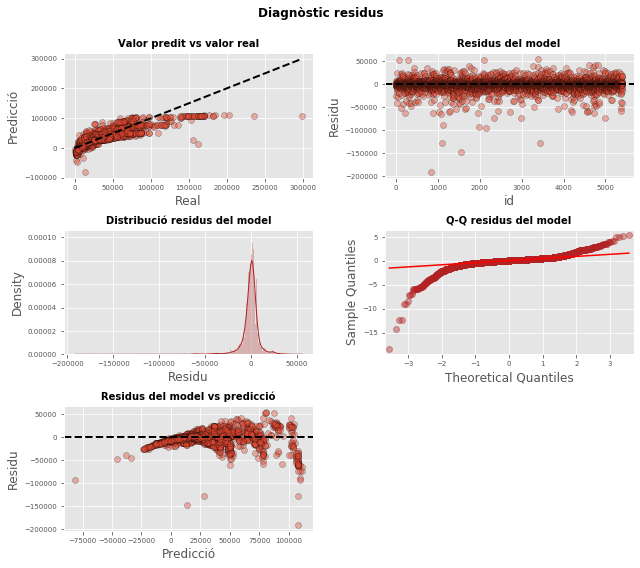

In [57]:
# Gràfics
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predit vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicció')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residus del model', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residu')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribució residus del model', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residu")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residus del model', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residus del model vs predicció', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicció')
axes[2, 0].set_ylabel('Residu')
axes[2, 0].tick_params(labelsize = 7)

# Eliminem axes buits
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnòstic residus', fontsize = 12, fontweight = "bold");
# fig.savefig('residus')

In [58]:
# Normalitat dels residus Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.713135838508606, 0.0)

In [59]:
# Normalitat dels residus D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadístico= {k2}, p-value = {p_value}")

Estadístico= 4846.062331304517, p-value = 0.0


In [60]:
# Normalitat dels atributs Shapiro-Wilk test
# ==============================================================================
print(stats.shapiro(df[2]))
print(stats.shapiro(df[4]))
print(stats.shapiro(df[27]))
print(stats.shapiro(df[31]))

(0.8627762198448181, 0.0)
(0.8165528774261475, 0.0)
(0.7372392416000366, 0.0)
(0.9227228164672852, 0.0)


In [61]:
from scipy.stats import levene

levene(df[2],df[4],df[27],df[31])

LeveneResult(statistic=6808.559695657819, pvalue=0.0)

In [62]:
# Error de test del model 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones
       )
print("")
print(f"L'error (mse) de test és: {mse}")


L'error (mse) de test és: 92471095.6205305


In [63]:
# Random Forest Regression
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor

df = df.dropna(subset=[2, 4, 9, 10, 27, 31])

X = df[cont_cols].drop([0, 9, 28, 10], axis=1)
y = df[9]

X.head()

,2,4,6,11,12,13,14,16,18,19,...,26,27,29,30,31,32,33,34,35,36
1,2017,87604,12,4933.0,1874.0,1455.0,2.912,2.24,4.0,5.0,...,7.0,140.0,400.0,232.0,8.2,5.2,3.9,4.4,114.0,7300.0
4,2018,67000,24,4663.0,1893.0,1659.0,2.819,2.32,5.0,5.0,...,6.0,110.0,320.0,206.0,9.7,5.2,4.0,4.5,120.0,6500.0
5,2016,73000,12,4725.0,1842.0,1431.0,2.820,2.06,5.0,5.0,...,7.0,140.0,320.0,238.0,7.5,6.8,4.9,5.2,124.0,5400.0
6,2014,45000,12,4385.0,1831.0,1608.0,2.603,2.17,5.0,5.0,...,7.0,103.0,320.0,0.0,0.0,6.8,5.2,5.8,152.0,6400.0
7,2016,78174,12,4310.0,1785.0,1425.0,2.636,1.80,5.0,5.0,...,6.0,81.0,250.0,200.0,10.7,4.7,3.6,4.0,105.0,5000.0


In [64]:
# Divisió de dades en train i test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [65]:
# Calculem les feature importances del RFR
# ==============================================================================
regressor.feature_importances_

array([0.11763194, 0.09672712, 0.00560532, 0.00450096, 0.04722504,
       0.0056202 , 0.02068252, 0.05653393, 0.0005536 , 0.00077227,
       0.00156031, 0.00239464, 0.46974435, 0.02095298, 0.00661691,
       0.12026862, 0.0038747 , 0.00639707, 0.00371151, 0.00635036,
       0.00227563])

In [66]:
# Creem dataframe amb les feature importances per fer el gràfic
# ==============================================================================
fi = pd.DataFrame({'feature': X_train.columns, 'importance': regressor.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,12,27,0.469744
1,15,31,0.120269
2,0,2,0.117632
3,1,4,0.096727
4,7,16,0.056534
5,4,12,0.047225
6,13,29,0.020953
7,6,14,0.020683
8,14,30,0.006617
9,17,33,0.006397


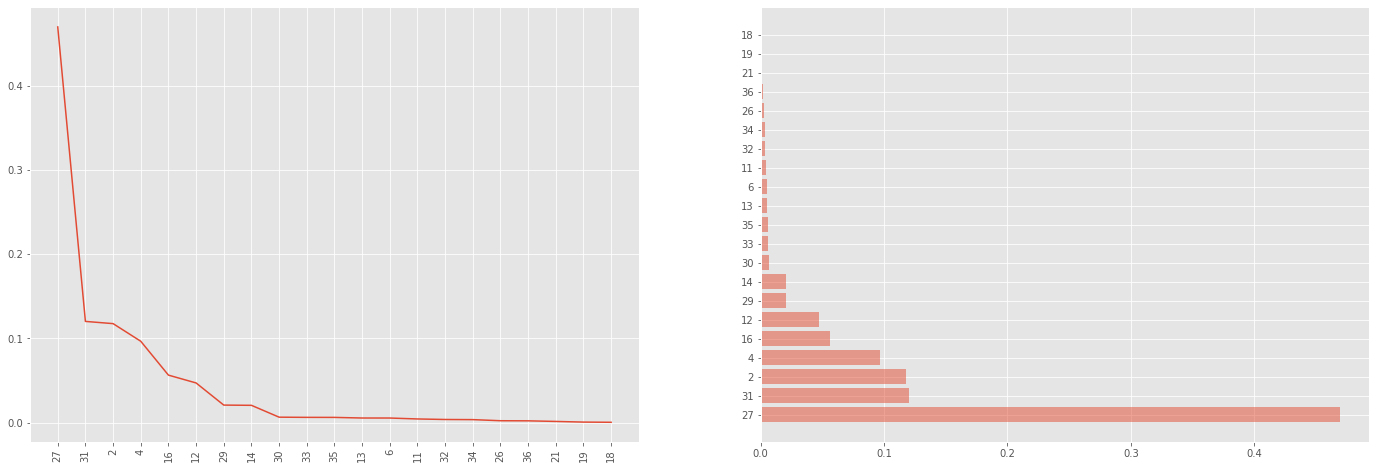

In [67]:
# Gràfic de les features importances
# ==============================================================================
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 1 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])
    # fig.savefig('feat_imp')

plot_feature_importance(fi)

In [68]:
# Definim un dataframe amb model i preus de cotxes vermells i no vermells
# ==============================================================================
df_red = df[[0,9]].loc[df[7].str.contains("Rojo")]
df_no_red = df[[0,9]].loc[df[7].str.contains("Rojo") == False]

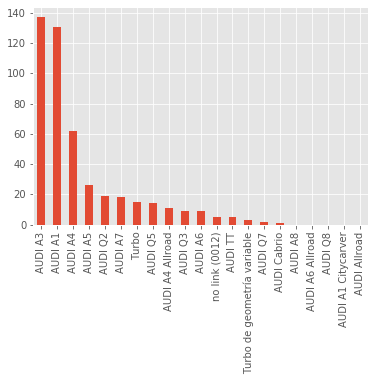

In [69]:
# Gràfic distribució models pels cotxes de color vermell
# ==============================================================================
df_red[0].value_counts().plot.bar()

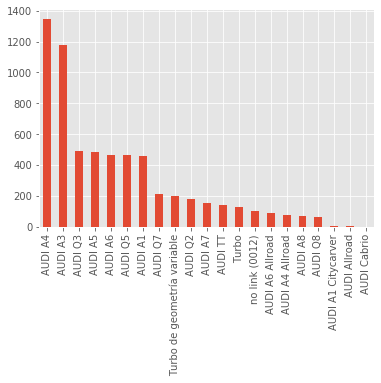

In [70]:
# Gràfic distribució models pels cotxes de color no vermell
# ==============================================================================
df_no_red[0].value_counts().plot.bar()

In [72]:
# T-test per les variables cotxes vermells i no vermells assumint igualtat de variàncies
# ==============================================================================
stats.ttest_ind(df_red[9],df_no_red[9])

Ttest_indResult(statistic=-4.572293545276073, pvalue=4.910123310708576e-06)

In [73]:
# T-test per les variables cotxes vermells i no vermells assumint variàncies diferents
# ==============================================================================
stats.ttest_ind(df_red[9],df_no_red[9], equal_var = False)

Ttest_indResult(statistic=-6.397379982456135, pvalue=3.084662110836687e-10)

In [74]:
# Valor de la mitjana del preu dels cotxes vermells
# ==============================================================================
df_red.mean()

9    20735.950749
dtype: float64

In [75]:
# Valor de la mitjana del preu dels cotxes no vermells
# ==============================================================================
df_no_red.mean()

9    25226.751908
dtype: float64